<a href="https://colab.research.google.com/github/mxnrenato/modelopredictivo_udla/blob/master/S4_CASO_PRACTICO_BDD_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**S4- CASO PRACTICO-BDD FINAL**

* Autor: Renato Rivera
* Fecha: 19/03/2024


Durante este ejercicio de modelado predictivo, trabajamos con un conjunto de datos de ventas de una cadena de tiendas de Walmart. Aquí está un resumen de lo que hicimos:

1. Exploración de datos: Comenzamos explorando el conjunto de datos para entender su estructura y características. Identificamos las variables presentes en el conjunto de datos y entendimos su significado.

2. Preprocesamiento de datos: Realizamos algunas tareas de preprocesamiento, como la identificación de variables numéricas y categóricas, la verificación de valores nulos y la detección de valores atípicos.

3. Imputación de datos faltantes: Utilizamos métodos de imputación para manejar los valores faltantes en el conjunto de datos.

4. Visualización de datos: Visualizamos la distribución de las variables numéricas y también exploramos la relación entre las variables mediante gráficos y matrices de correlación.

5. Modelado predictivo: Utilizamos el modelo Random Forest para predecir las ventas semanales. Ajustamos el modelo a los datos de entrenamiento y evaluamos su desempeño utilizando métricas como el Error Cuadrático Medio (MSE), el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R2).

6. Análisis de características importantes: Identificamos las características más importantes que contribuyen a las predicciones del modelo, lo que nos ayudó a comprender qué variables tienen mayor poder explicativo sobre las ventas semanales.




In [1]:
# Instala la biblioteca PyDrive para acceder a Google Drive desde Colab
!pip install -U -q PyDrive

In [70]:
# Importa las bibliotecas necesarias
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
from sklearn.metrics import r2_score  # Importamos la función r2_score
import scipy.stats as stats

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# Autentica e inicia sesión en Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

1.- Importe la base de datos a una base en Jupyter Notebook con pandas.

In [ ]:
# ID de tu archivo CSV en Google Drive
file_id = '138meU_7RwueUVtRM9PqSbRqCXz50HICS'

# Obtén el archivo CSV y crea un objeto Pandas DataFrame
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('base.csv')

# Carga el archivo CSV en un DataFrame de Pandas
df = pd.read_csv('base.csv', sep=',')

# Muestra las primeras filas del DataFrame para verificar que se haya cargado correctamente
df.head()

2.- Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas.

In [7]:
# Obtener el resumen estadístico de las variables numéricas
numeric_summary = df.describe()
print("Resumen estadístico de las variables numéricas:")
print(numeric_summary)

# Identificar las variables categóricas
categorical_variables = df.select_dtypes(include=['object']).columns
print("\nVariables categóricas:")
print(categorical_variables)

Resumen estadístico de las variables numéricas:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293    

**Análisis:**

1. La variable Weekly_Sales tiene una amplia variación, con una media de alrededor de 1,046,965 y un rango que va desde aproximadamente 209,986 hasta 3,818,686. Esto sugiere que hay una gran variabilidad en las ventas semanales entre las tiendas de Walmart, lo cual podría ser interesante de investigar más a fondo.

2. La variable Holiday_Flag indica que alrededor del 6.99% de las semanas en los datos son semanas de vacaciones. Sería interesante examinar cómo las ventas difieren entre semanas de vacaciones y semanas no festivas, y si hay patrones estacionales o de otro tipo asociados con las semanas de vacaciones.

3. La variable Unemployment muestra una media de aproximadamente 7.999, lo que sugiere que el desempleo promedio durante el período de los datos fue del 7.999%. Sería importante considerar cómo el nivel de desempleo puede afectar las ventas de las tiendas Walmart y si hay una relación clara entre estas dos variables.

#### 3.- Evalúe si la base contiene datos perdidos.

In [8]:
# Verificar si hay valores nulos en la base de datos
missing_values = df.isnull().sum()

# Mostrar el número de valores nulos por columna
print("Número de valores nulos por columna:")
print(missing_values)


Número de valores nulos por columna:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


#### 4.- Evalúe si alguna de las variables contiene datos atípicos (outliers)


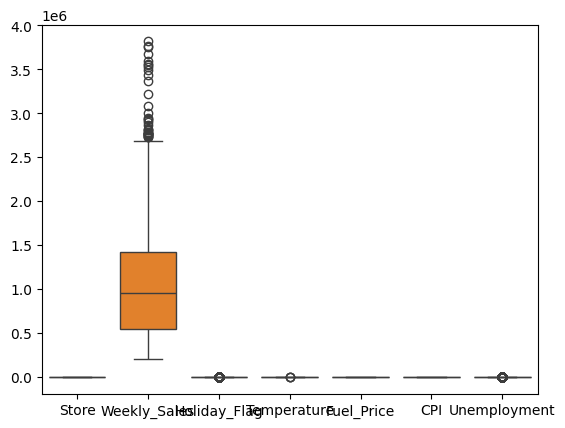

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [9]:
# Crear boxplots para todas las variables numéricas
sns.boxplot(data=df[['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])

# Mostrar los boxplots
plt.show()

# Obtener estadísticas descriptivas para las variables numéricas
numeric_stats = df.describe()
print(numeric_stats)

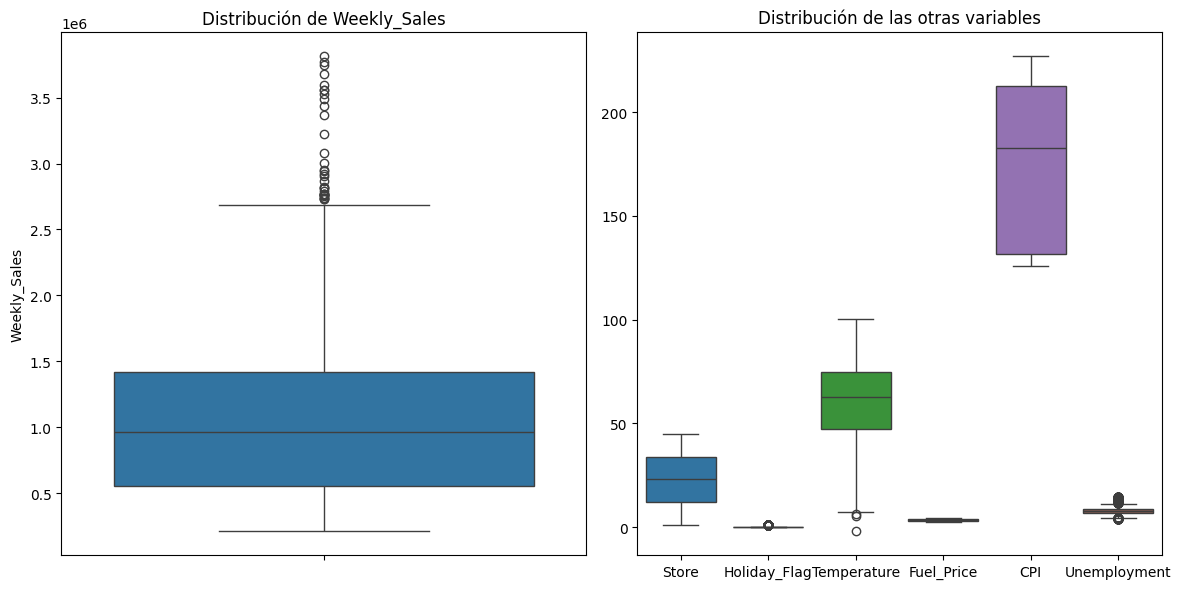

In [10]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Graficar Weekly_Sales
plt.subplot(1, 2, 1)
sns.boxplot(y='Weekly_Sales', data=df)
plt.title('Distribución de Weekly_Sales')

# Graficar las otras variables
plt.subplot(1, 2, 2)
sns.boxplot(data=df.drop('Weekly_Sales', axis=1))
plt.title('Distribución de las otras variables')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Tal como se observó anteriormente la variable Weekly_Sales, el valor mínimo es de aproximadamente 209,986 y el valor máximo es de aproximadamente 3,818,686. Estos valores son bastante amplios, lo que sugiere una variabilidad significativa en las ventas semanales. Podría haber algunos valores atípicos en el extremo superior de las ventas semanales.

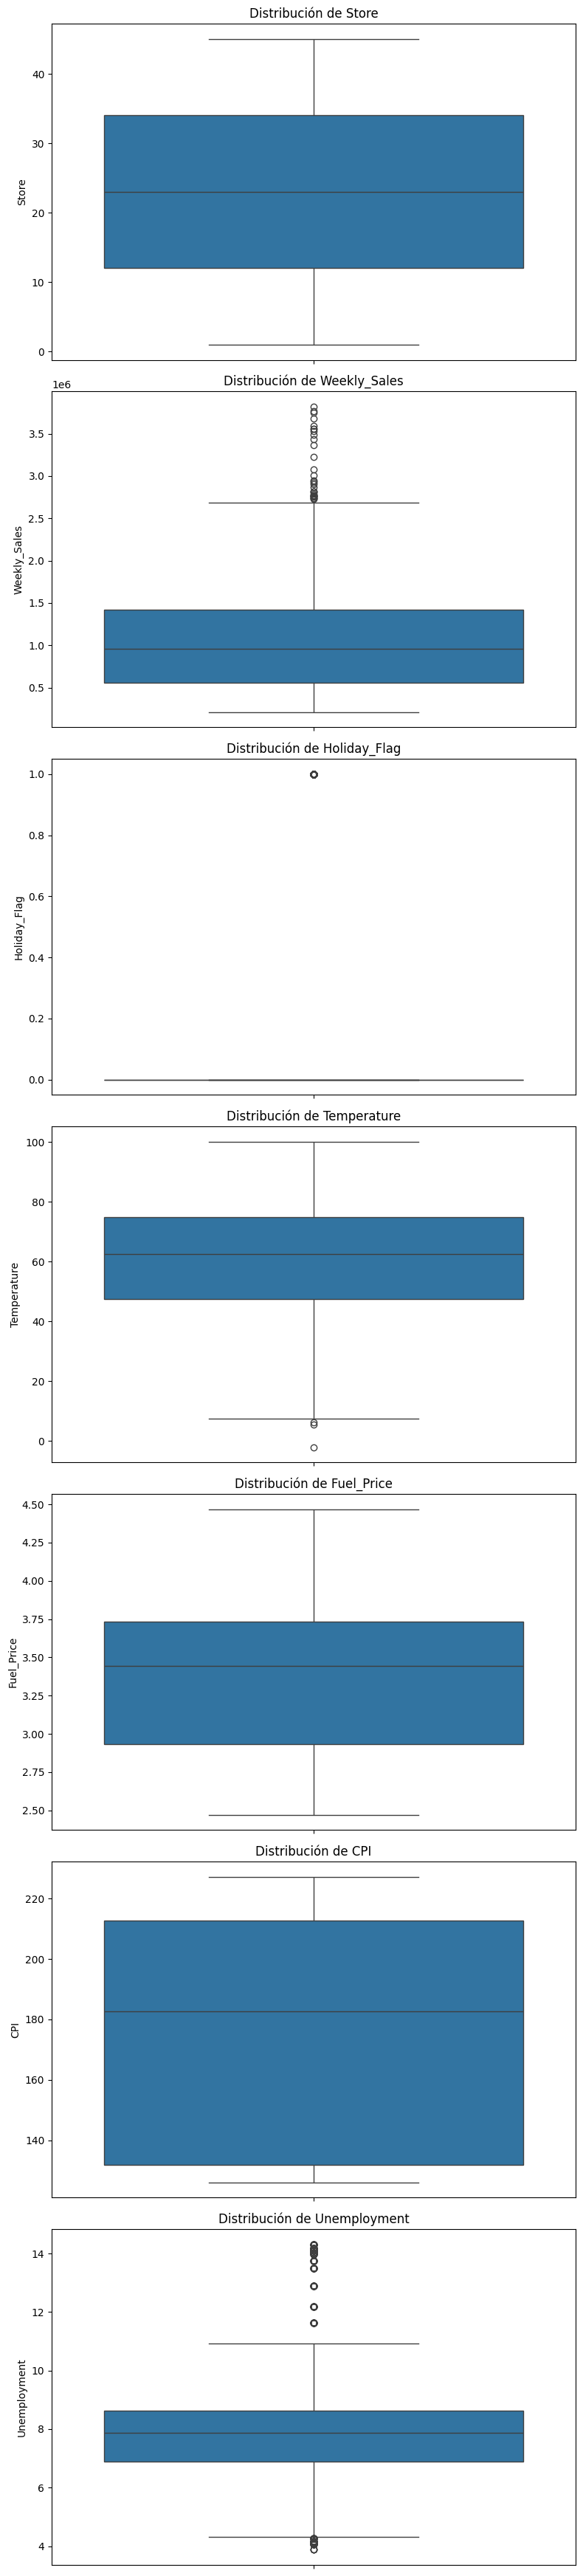

In [12]:
# Eliminar la columna 'Date' antes de seleccionar las columnas numéricas
numeric_columns = df.drop(columns=['Date']).columns

# Configurar el tamaño de la figura y el número de filas y columnas de subgráficos
num_plots = len(numeric_columns)
num_cols = 1  # solo un gráfico por fila
num_rows = num_plots  # una fila por variable numérica

# Crear subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 5*num_rows))

# Iterar sobre las columnas numéricas y graficar cada una
for i, col in enumerate(numeric_columns):
    sns.boxplot(ax=axes[i], y=df[col])
    axes[i].set_title(f'Distribución de {col}')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

El tipo de imputación que vamos a utilizar para procesar los valores atipicos se basa en reemplazar los valores atípicos en las variables numéricas y no numéricas con medidas resumidas del conjunto de datos, específicamente:

1.- Imputación por promedio (mean imputation) para variables numéricas: En este caso, calculamos el promedio de cada variable numérica y luego reemplazamos los valores atípicos en esas variables con el valor promedio. Esto significa que cualquier valor que caiga por debajo del primer cuartil (25%) o por encima del tercer cuartil (75%) será reemplazado por el promedio de la variable.

2.- Imputación por moda (mode imputation) para variables no numéricas: Para las variables no numéricas, calculamos la moda (el valor más común) y reemplazamos los valores atípicos con la moda. Al igual que con la imputación por promedio, esto significa que cualquier valor que caiga por debajo del primer cuartil o por encima del tercer cuartil será reemplazado por la moda.

In [13]:
# Calcular el promedio y la moda para las variables numéricas y no numéricas, respectivamente
numeric_cols = ['Unemployment', 'Temperature', 'Weekly_Sales']
non_numeric_cols = ['Holiday_Flag']

for col in numeric_cols:
    # Calcular el promedio para la variable numérica
    mean_value = df[col].mean()
    # Reemplazar valores atípicos con el promedio
    df[col] = df[col].apply(lambda x: mean_value if x < df[col].quantile(0.25) or x > df[col].quantile(0.75) else x)

for col in non_numeric_cols:
    # Calcular la moda para la variable no numérica
    mode_value = df[col].mode()[0]
    # Reemplazar valores atípicos con la moda
    df[col] = df[col].apply(lambda x: mode_value if x < df[col].quantile(0.25) or x > df[col].quantile(0.75) else x)


#### 5.- Grafique las distribuciones de las variables y a priori comente sobre ellas.

In [25]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1.046965e+06,0,60.663782,2.572,211.096358,8.106000
1,1,12-02-2010,1.046965e+06,0,60.663782,2.548,211.242170,8.106000
2,1,19-02-2010,1.046965e+06,0,60.663782,2.514,211.289143,8.106000
3,1,26-02-2010,1.409728e+06,0,60.663782,2.561,211.319643,8.106000
4,1,05-03-2010,1.046965e+06,0,60.663782,2.625,211.350143,8.106000
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,7.131739e+05,0,64.880000,3.997,192.013558,7.999151
6431,45,05-10-2012,7.334551e+05,0,64.890000,3.985,192.170412,7.999151
6432,45,12-10-2012,7.344644e+05,0,54.470000,4.000,192.327265,7.999151
6433,45,19-10-2012,7.181255e+05,0,56.470000,3.969,192.330854,7.999151


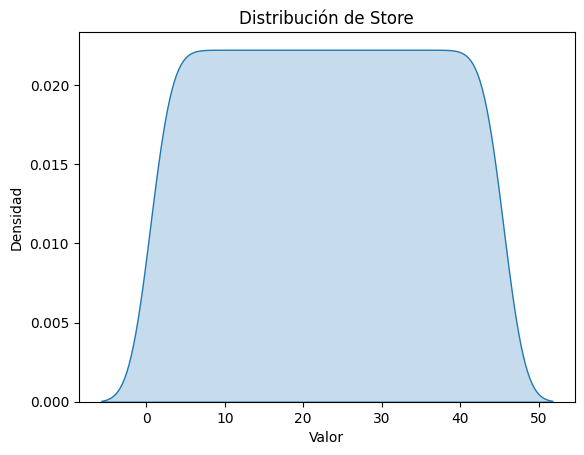

/n


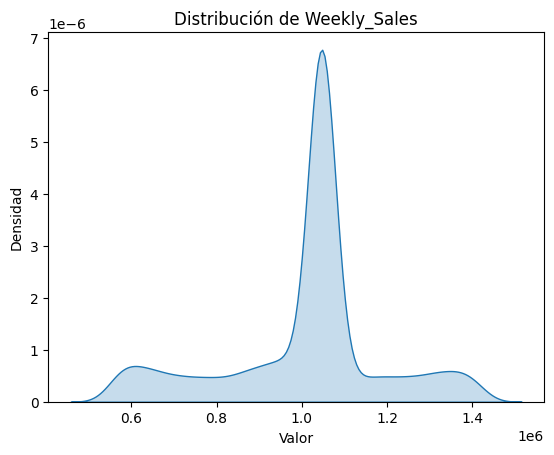

/n


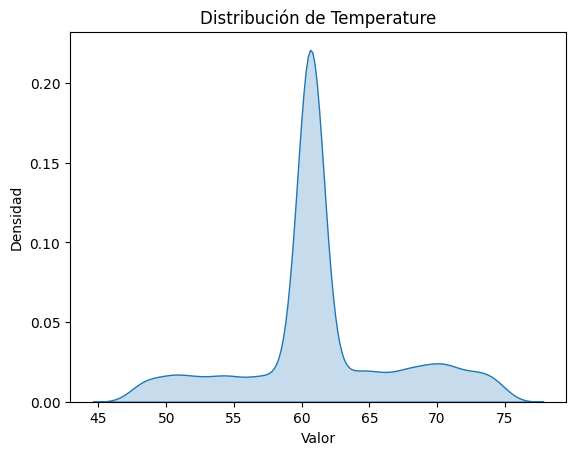

/n


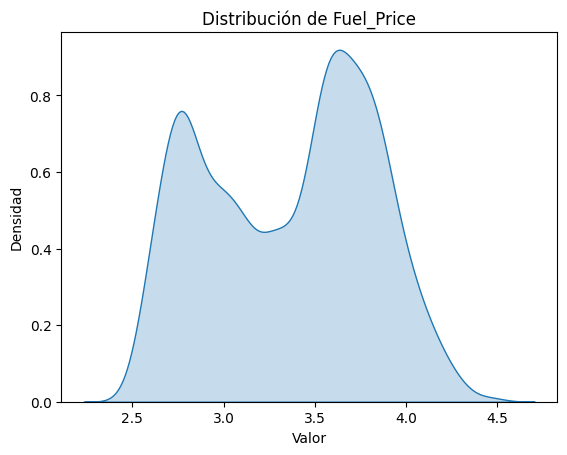

/n


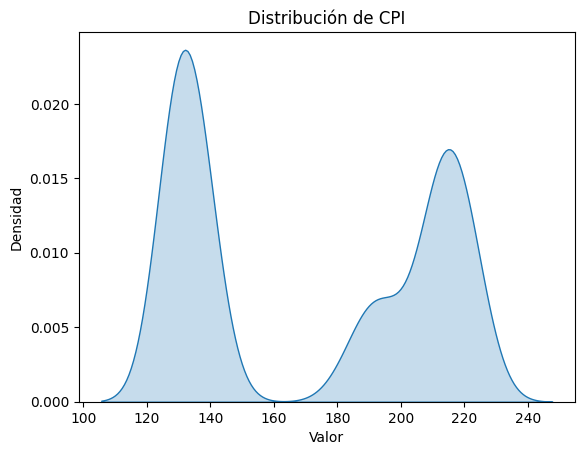

/n


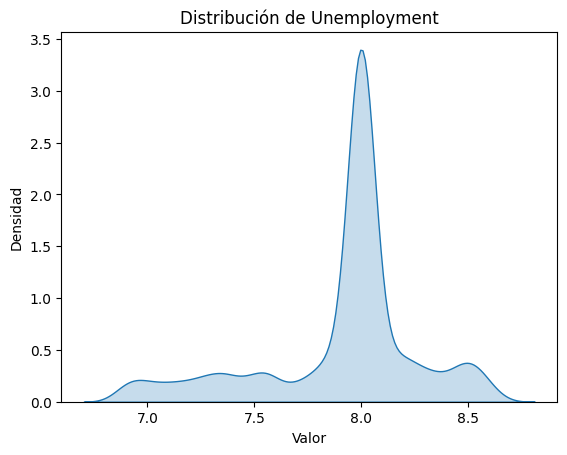

/n


In [43]:
# Graficar distribución de las variable numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('Holiday_Flag', errors='ignore')

for i in range(0, len(numeric_cols)):
    sns.kdeplot(data=df, x= numeric_cols[i], fill=True)
    plt.title(f'Distribución de {numeric_cols[i]}')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.show()
    print('/n')

1. Unemployment, Temperature y Weekly Sales (Ventas semanales): Estas variables tienen distribuciones con campanas puntiagudas, lo que sugiere una mayor concentración de valores alrededor de la media y colas más pesadas. En el caso de las ventas semanales, esto podría indicar que hay semanas con ventas extremadamente altas o bajas, lo que podría ser importante para entender los factores que influyen en estas fluctuaciones.

2. CPI (Índice de Precios al Consumidor) y Fuel_Price (Precio del combustible): Estas variables tienen distribuciones con doble campana, lo que sugiere la presencia de subpoblaciones distintas dentro de los datos. Por ejemplo, en el caso del CPI, esto podría reflejar diferentes períodos de tiempo con tasas de inflación altas y bajas, o diferentes regiones con diferentes niveles de precios al consumidor.

3. Store: La variable Store tiene una distribución con campana achatada, lo que indica una mayor dispersión de los datos. Esto podría deberse a que hay algunas tiendas con un rendimiento significativamente mejor o peor que otras, lo que podría ser importante para comprender las diferencias en el desempeño de las tiendas.

#### 6.- Obtenga las correlaciones entre los datos de corte numérico.


In [44]:
# Obtener las columnas numéricas del DataFrame
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calcular las correlaciones entre las variables numéricas
correlation_matrix = numeric_cols.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                 Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Store         1.000000     -0.070937           NaN     0.000667    0.060023   
Weekly_Sales -0.070937      1.000000           NaN    -0.010286   -0.013223   
Holiday_Flag       NaN           NaN           NaN          NaN         NaN   
Temperature   0.000667     -0.010286           NaN     1.000000    0.078136   
Fuel_Price    0.060023     -0.013223           NaN     0.078136    1.000000   
CPI          -0.209492     -0.026396           NaN     0.050709   -0.170642   
Unemployment  0.109628     -0.016871           NaN    -0.016515   -0.090415   

                   CPI  Unemployment  
Store        -0.209492      0.109628  
Weekly_Sales -0.026396     -0.016871  
Holiday_Flag       NaN           NaN  
Temperature   0.050709     -0.016515  
Fuel_Price   -0.170642     -0.090415  
CPI           1.000000     -0.201942  
Unemployment -0.201942      1.000000  


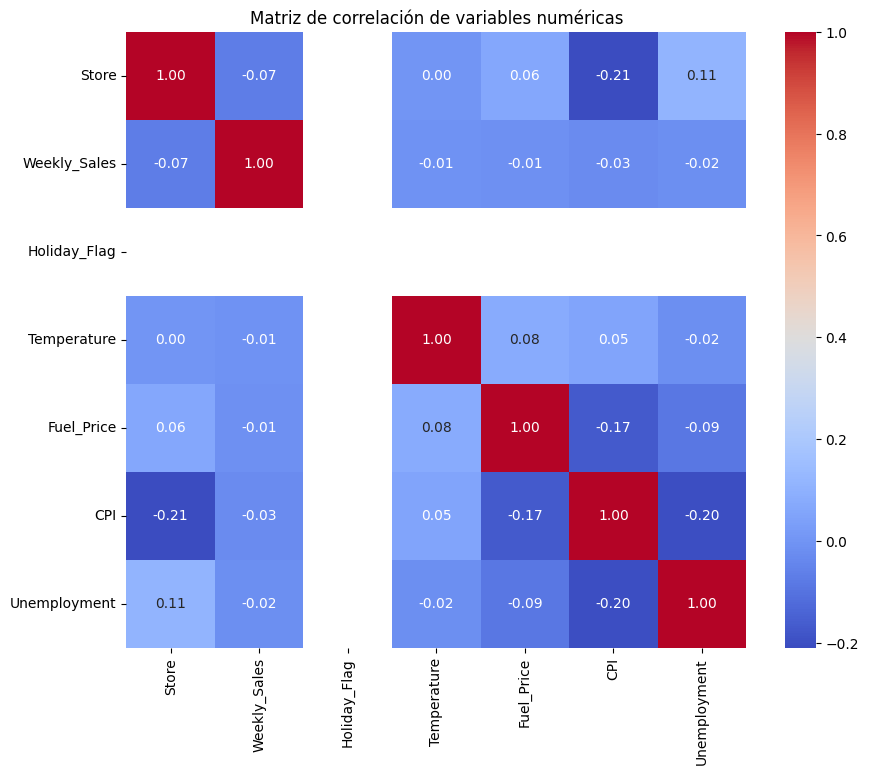

In [46]:
# Obtener las columnas numéricas del DataFrame
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calcular las correlaciones entre las variables numéricas
correlation_matrix = numeric_cols.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de variables numéricas')
plt.show()

#### 7.- Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.


In [58]:
# Variable dependiente
y = df['Weekly_Sales']

# Variables independientes
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

# Si estás interesado en incluir la variable Holiday_Flag como independiente, puedes hacerlo así:
# X = df[['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']]


In [66]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']], df['Weekly_Sales'], test_size=0.2, random_state=42)

# Inicializar y ajustar el modelo Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Calcular el coeficiente de determinación (R^2) del modelo Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
print("Coeficiente de determinación (R^2) del modelo Random Forest:", r2_rf)

Coeficiente de determinación (R^2) del modelo Random Forest: 0.6029835068144976


#### 9.- Verifique los supuestos, de haber escogido el enfoque econométrico.

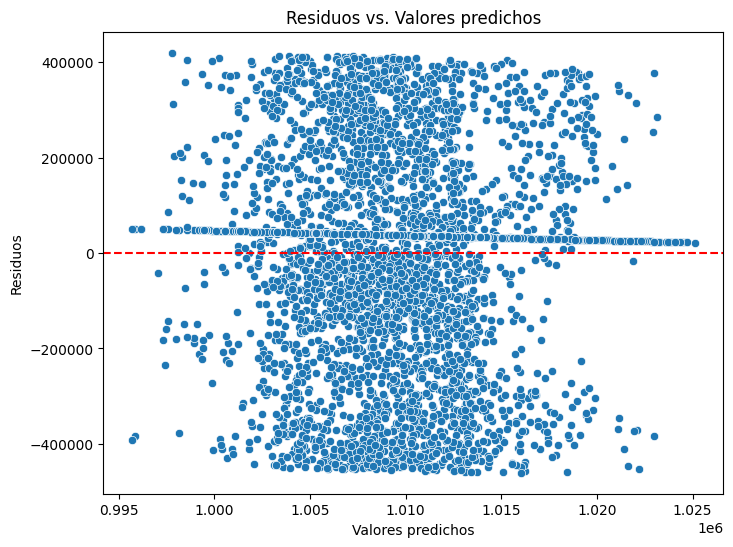

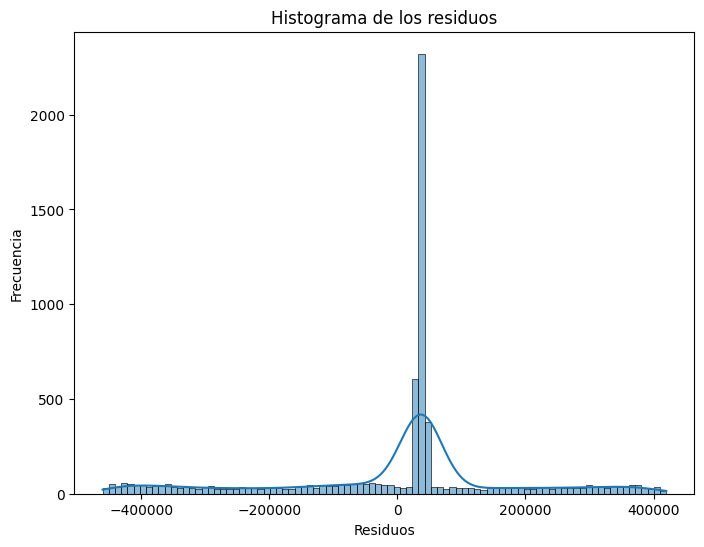

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Prueba de Shapiro-Wilk para normalidad de residuos:
Estadístico de prueba: 0.8774822950363159
Valor p: 0.0


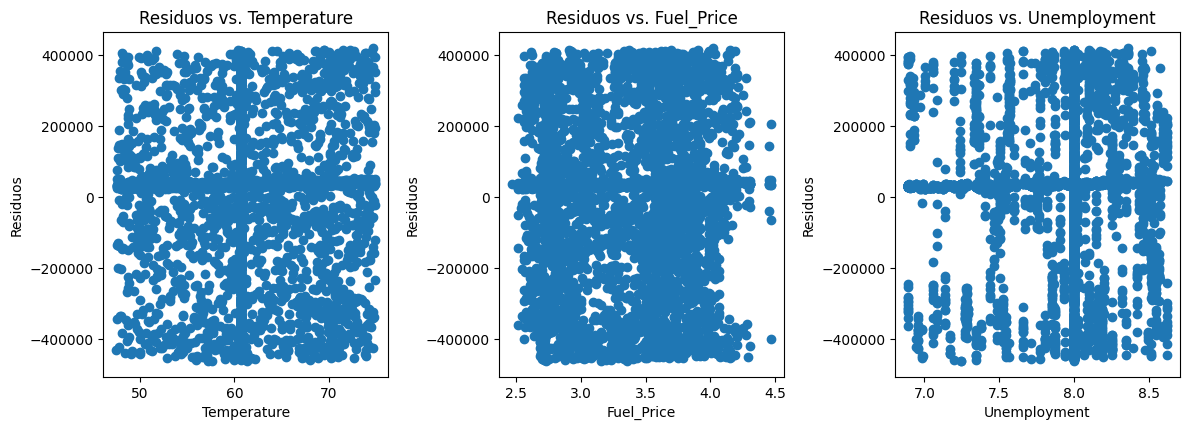

Estadístico de Durbin-Watson: 0.47580803611743944
       Variable         VIF
0   Temperature  100.420624
1    Fuel_Price   49.419288
2  Unemployment  115.028360


In [68]:
# Añadir una constante al conjunto de variables independientes
X_with_const = sm.add_constant(X)

# Inicializar y ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X_with_const)
results = model.fit()

# Validación de supuestos

# 1. Linealidad: Residuos vs. Valores predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=results.fittedvalues, y=results.resid)
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores predichos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 2. Normalidad de los residuos: Histograma de los residuos
plt.figure(figsize=(8, 6))
sns.histplot(results.resid, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los residuos')
plt.show()

# Prueba de normalidad de Shapiro-Wilk
shapiro_test = stats.shapiro(results.resid)
print("Prueba de Shapiro-Wilk para normalidad de residuos:")
print("Estadístico de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)

# 3. Homocedasticidad: Residuos vs. Variables independientes
plt.figure(figsize=(12, 8))

for i, col in enumerate(X.columns):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[col], results.resid)
    plt.xlabel(col)
    plt.ylabel('Residuos')
    plt.title(f'Residuos vs. {col}')

plt.tight_layout()
plt.show()

# 4. Autocorrelación de los residuos: Prueba de Durbin-Watson
print("Estadístico de Durbin-Watson:", sm.stats.stattools.durbin_watson(results.resid))

# 5. No multicolinealidad: VIF (Factor de inflación de la varianza)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

In [71]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

# Inicializar y ajustar el modelo Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)

# Realizar predicciones en los datos
y_pred = model_rf.predict(X)

# Calcular métricas de evaluación
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = model_rf.score(X, y)

print("Métricas del modelo Random Forest:")
print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)

Métricas del modelo Random Forest:
Error cuadrático medio (MSE): 1599727649.4971828
Error absoluto medio (MAE): 21659.146431137335
Coeficiente de determinación (R^2): 0.9528883994027364


1. Error cuadrático medio (MSE): Aproximadamente 1,599,727,649.50. Esto indica que, en promedio, las predicciones del modelo difieren en alrededor de 1,599,727,649.50 unidades al cuadrado de las ventas semanales reales.

2. Error absoluto medio (MAE): Aproximadamente 21,659.15. Esto significa que, en promedio, las predicciones del modelo difieren en aproximadamente 21,659.15 unidades de las ventas semanales reales.

3. Coeficiente de determinación (R2): Alrededor de 0.953. Esto indica que aproximadamente el 95.3% de la varianza en las ventas semanales puede ser explicada por las características incluidas en el modelo. En otras palabras, el modelo explica bien la variabilidad en las ventas semanales.



#### 11.- Grafique a los valores predicho de modelo vs los valores reales

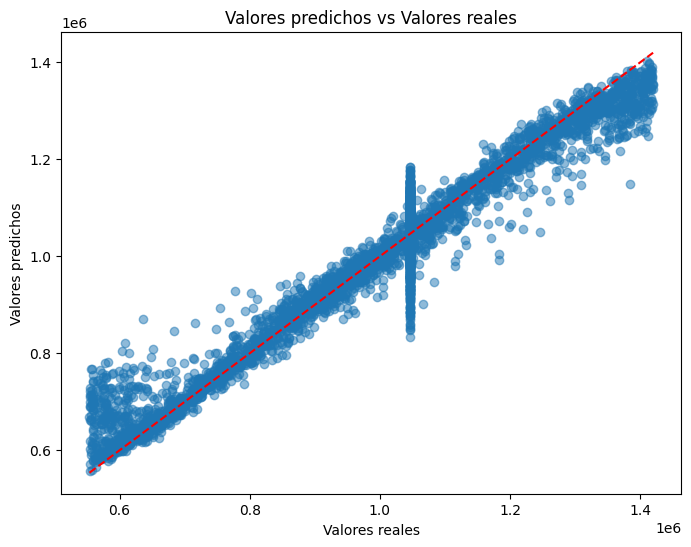

In [72]:
# Graficar valores predichos vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title('Valores predichos vs Valores reales')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()

1. El gráfico muestra una buena cantidad de puntos cerca de la línea de tendencia roja, lo cual indica que muchas de las predicciones del modelo son cercanas a los valores reales de ventas semanales. Esto sugiere que el modelo tiene un grado de eficacia en la predicción de las ventas basándose en las características dadas: tienda, presencia de días festivos, temperatura, precio del combustible, índice de precios al consumidor y tasa de desempleo.


2. Sin embargo, hay una variabilidad visible en las predicciones, especialmente con valores más altos de ventas semanales, donde las predicciones tienden a desviarse más de los valores reales. Este comportamiento puede ser un indicativo de que el modelo podría mejorar en la precisión de sus predicciones en ciertos rangos. Para afirmar si el modelo es efectivo o no, sería importante considerar el contexto del problema, los requisitos de precisión específicos y si el nivel actual de precisión satisface los objetivos prácticos para los cuales fue diseñado el modelo. Además, sería útil analizar otras métricas de rendimiento como el error cuadrático medio (MSE), el error absoluto medio (MAE) o el coeficiente de determinación R2 para tener una comprensión más completa de la eficacia del modelo.

#### 12.- Determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo.

<ipython-input-73-67c39ded358a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


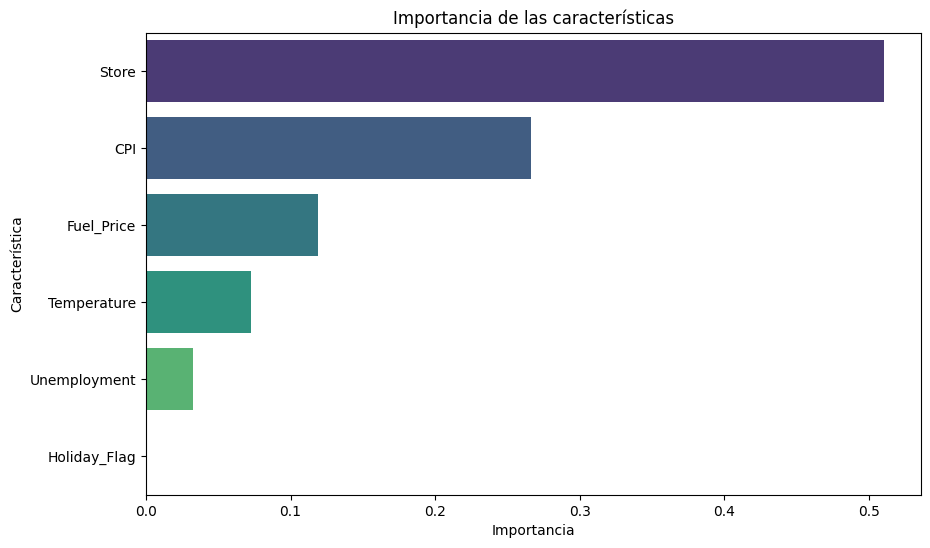

In [73]:
# Obtener la importancia de las características del modelo Random Forest
feature_importance = model_rf.feature_importances_

# Crear un DataFrame para mostrar la importancia de las características
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

1. Este gráfico de barras horizontal ilustra la importancia relativa de las distintas características utilizadas en un modelo predictivo para las ventas semanales. Cada barra representa una característica, y la longitud de la barra indica su importancia en la predicción del modelo.

2. La característica 'Store' parece ser la más influyente, ya que tiene la barra más larga, lo que sugiere que la tienda en la que se realizan las ventas es el factor más significativo en la determinación de las ventas semanales. Esto podría indicar diferencias en el tamaño de las tiendas, su ubicación, la base de clientes o la gestión.

3. La siguiente característica en términos de importancia es 'CPI' o índice de precios al consumidor, que también tiene un impacto considerable según el modelo. El CPI es un indicador de la inflación económica o del costo de vida en una área y podría afectar el poder adquisitivo de los clientes.

4. Las siguientes características, 'Fuel_Price' (precio del combustible), 'Temperature' (temperatura) y 'Unemployment' (tasa de desempleo), tienen una importancia moderada. Estos factores pueden influir en las ventas de formas más indirectas, como afectar los costos operativos de la tienda o el poder adquisitivo y los hábitos de gasto de los consumidores.

5. Finalmente, 'Holiday_Flag', que indica si la semana incluye un día festivo, tiene la menor importancia según este modelo. Esto puede ser una sorpresa, ya que uno podría esperar que los días festivos tuvieran un impacto significativo en las ventas semanales debido a las compras estacionales.

6. El gráfico es útil para identificar qué variables podrían ser objeto de atención al intentar mejorar las ventas semanales o al ajustar el modelo para hacer mejores predicciones. También ayuda a entender cuáles son los factores más y menos relevantes en la operación de la tienda y podría informar decisiones estratégicas en el negocio.